### Import Libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

### Loading datasets

In [184]:
X_train_images = open("X_train_data_stft.pickle", "rb")
X_train = pickle.load(X_train_images)
X_train_images.close()
print(X_train.shape)

X_test_images = open("X_test_data_stft.pickle", "rb")
X_test = pickle.load(X_test_images)
X_test_images.close()
print(X_test.shape)

Y_train_images = open("Y_train_data_stft.pickle", "rb")
y_train = pickle.load(Y_train_images)
Y_train_images.close()
print(y_train.shape)

Y_test_images = open("Y_test_data_stft.pickle", "rb")
y_test = pickle.load(Y_test_images)
Y_test_images.close()
print(y_test.shape)


(400, 28, 28, 1)
(200, 28, 28, 1)
(400,)
(200,)


In [185]:
# X_train = X_train.reshape(X_train.shape[0], 28*28)
# X_test = X_test.reshape(X_test.shape[0], 28*28)

# print(X_train.shape)
# print(X_test.shape)

In [186]:
# mn = X_train.reshape(400, -1)
# mn.shape

# tsne = TSNE(n_components=2, random_state=0)
# X_compressed_2d  =  tsne.fit_transform(mn)

# plt.figure(figsize = (12, 7))
# cmap = plt.get_cmap('RdBu', 10)
# sc = plt.scatter(X_compressed_2d[:, 0], X_compressed_2d[:, 1], c = y_test, alpha = .85, cmap = cmap)
# cax = plt.colorbar(sc, ticks=np.arange(0,10))
# plt.xlabel('tsne 1')
# plt.ylabel('tsne 2')

### DNN model

In [187]:
in_data = tf.keras.layers.Input(shape=(28,28,1))
flatten_layer = tf.keras.layers.Flatten()(in_data)
dense_layer1 = tf.keras.layers.Dense(512, activation='relu')(flatten_layer)
dense_layer2 = tf.keras.layers.Dense(512, activation='relu')(dense_layer1)
dense_layer3 = tf.keras.layers.Dense(256, activation='relu')(dense_layer2)
dense_layer4 = tf.keras.layers.Dense(256, activation='relu')(dense_layer3)
output = tf.keras.layers.Dense(4, activation='softmax')(dense_layer4)
model_dnn = tf.keras.models.Model(in_data, output)
model_dnn.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 512)               401920    
                                                                 
 dense_47 (Dense)            (None, 512)               262656    
                                                                 
 dense_48 (Dense)            (None, 256)               131328    
                                                                 
 dense_49 (Dense)            (None, 256)               65792     
                                                                 
 dense_50 (Dense)            (None, 4)                 102

In [188]:
# in_data = tf.keras.layers.Input(shape=(28,28,1))
# model_1 = tf.keras.models.Sequential()
# model_1.add(tf.keras.layers.Dense(512, input_dim=784, activation='relu'))
# model_1.add(tf.keras.layers.Dense(512, activation='relu'))
# model_1.add(tf.keras.layers.Dense(256, activation='relu'))
# model_1.add(tf.keras.layers.Dense(256, activation='relu'))
# model_1.add(tf.keras.layers.Dense(4, activation='softmax'))
# model_1.summary()

In [189]:
model_dnn.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                 metrics=['accuracy'])

history_dnn = model_dnn.fit(X_train, y_train, epochs=40,
                            verbose=2, batch_size=8,
                            validation_data = (X_test, y_test))

Epoch 1/40


C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


50/50 - 1s - loss: 8.4198 - accuracy: 0.4950 - val_loss: 1.6346 - val_accuracy: 0.6500 - 965ms/epoch - 19ms/step
Epoch 2/40
50/50 - 0s - loss: 1.3673 - accuracy: 0.6500 - val_loss: 3.1233 - val_accuracy: 0.5550 - 252ms/epoch - 5ms/step
Epoch 3/40
50/50 - 0s - loss: 1.0443 - accuracy: 0.8000 - val_loss: 0.8917 - val_accuracy: 0.7250 - 254ms/epoch - 5ms/step
Epoch 4/40
50/50 - 0s - loss: 0.8571 - accuracy: 0.8700 - val_loss: 0.4078 - val_accuracy: 0.8600 - 249ms/epoch - 5ms/step
Epoch 5/40
50/50 - 0s - loss: 0.6683 - accuracy: 0.8850 - val_loss: 2.1896 - val_accuracy: 0.6150 - 251ms/epoch - 5ms/step
Epoch 6/40
50/50 - 0s - loss: 0.5486 - accuracy: 0.9000 - val_loss: 1.3137 - val_accuracy: 0.6850 - 248ms/epoch - 5ms/step
Epoch 7/40
50/50 - 0s - loss: 0.7272 - accuracy: 0.9075 - val_loss: 0.2697 - val_accuracy: 0.8900 - 253ms/epoch - 5ms/step
Epoch 8/40
50/50 - 0s - loss: 0.3651 - accuracy: 0.9300 - val_loss: 0.1513 - val_accuracy: 0.9250 - 249ms/epoch - 5ms/step
Epoch 9/40
50/50 - 0s - lo

In [190]:
test_loss, test_acc  =model_dnn.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy: ', test_acc*100, '%')

7/7 - 0s - loss: 0.0932 - accuracy: 0.9900 - 81ms/epoch - 12ms/step

Test accuracy:  99.00000095367432 %


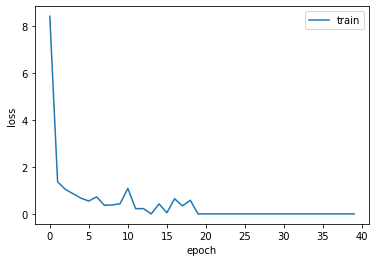

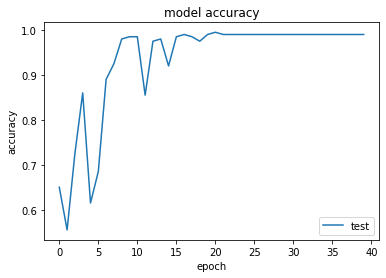

In [191]:
# "Loss"
plt.plot(history_dnn.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#  "Accuracy"
plt.plot(history_dnn.history['val_accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower right')
plt.show()

### CNN model

In [192]:
in_data = tf.keras.layers.Input(shape=(28,28,1))
con_layer1 = tf.keras.layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu')(in_data)
con_layer2 = tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu')(con_layer1)
max_layer1 = tf.keras.layers.MaxPooling2D()(con_layer2)
con_layer3 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(max_layer1)
con_layer4 = tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu')(con_layer3)
max_layer2 = tf.keras.layers.MaxPooling2D()(con_layer4)
# con_layer5 = tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(max_layer2)
# con_layer6 = tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu')(con_layer3)

flatten_layer = tf.keras.layers.Flatten()(max_layer2)
dense_lay1 = tf.keras.layers.Dense(512, activation='relu')(flatten_layer)
dense_lay2 = tf.keras.layers.Dense(512, activation='relu')(dense_lay1)
out_lay = tf.keras.layers.Dense(4, activation='softmax')(dense_lay2)

model = tf.keras.models.Model(in_data, out_lay)
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 64)        36928     
                                                          

In [193]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

history_cnn = model.fit(X_train, y_train, epochs=40, 
                    verbose=2, batch_size=4, 
                    validation_data = (X_test, y_test))

Epoch 1/40
100/100 - 1s - loss: 1.5841 - accuracy: 0.6450 - val_loss: 0.7403 - val_accuracy: 0.7600 - 1s/epoch - 12ms/step
Epoch 2/40
100/100 - 1s - loss: 0.3873 - accuracy: 0.8700 - val_loss: 0.0343 - val_accuracy: 0.9900 - 699ms/epoch - 7ms/step
Epoch 3/40
100/100 - 1s - loss: 0.2394 - accuracy: 0.9575 - val_loss: 0.0252 - val_accuracy: 0.9900 - 677ms/epoch - 7ms/step
Epoch 4/40
100/100 - 1s - loss: 0.3076 - accuracy: 0.9525 - val_loss: 0.0292 - val_accuracy: 0.9900 - 673ms/epoch - 7ms/step
Epoch 5/40
100/100 - 1s - loss: 0.1207 - accuracy: 0.9800 - val_loss: 0.0316 - val_accuracy: 0.9950 - 670ms/epoch - 7ms/step
Epoch 6/40
100/100 - 1s - loss: 0.1479 - accuracy: 0.9750 - val_loss: 0.0285 - val_accuracy: 0.9900 - 679ms/epoch - 7ms/step
Epoch 7/40
100/100 - 1s - loss: 0.0739 - accuracy: 0.9925 - val_loss: 0.0288 - val_accuracy: 0.9950 - 670ms/epoch - 7ms/step
Epoch 8/40
100/100 - 1s - loss: 0.0464 - accuracy: 0.9900 - val_loss: 0.0390 - val_accuracy: 0.9900 - 675ms/epoch - 7ms/step
Ep

In [194]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc*100, "%")

7/7 - 0s - loss: 0.1096 - accuracy: 0.9900 - 95ms/epoch - 14ms/step

Test accuracy: 99.00000095367432 %


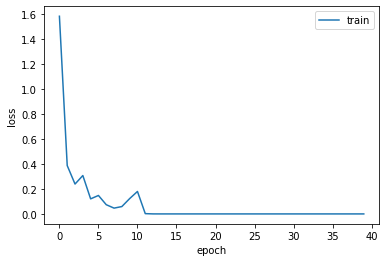

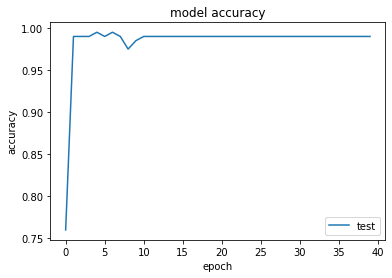

In [195]:
# "Loss"
plt.plot(history_cnn.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#  "Accuracy"
plt.plot(history_cnn.history['val_accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower right')
plt.show()

### Standard Stacked Sparese Autoencoder (Standard SAE)

In [196]:
# AutoEncoder Model Preparation
input_data_shape= tf.keras.layers.Input(shape=(28, 28, 1))
# define encoder
flutten_layer_1= tf.keras.layers.Flatten()(input_data_shape)

# SAE 
encoder= tf.keras.layers.Dense(512, activation='selu')(flutten_layer_1)
encoder= tf.keras.layers.Dense(256, activation='selu')(encoder)
encoder= tf.keras.layers.Dense(128, activation='selu')(encoder)
encoder = tf.keras.layers.ActivityRegularization(l1=1e-3)(encoder)

bottleneck = tf.keras.layers.Dense(64, activation='selu')(encoder)

decoder = tf.keras.layers.Dense(128, activation='selu')(bottleneck)
decoder = tf.keras.layers.Dense(256, activation='selu')(decoder)
decoder = tf.keras.layers.Dense(512, activation='selu')(decoder)

# output layer
output = tf.keras.layers.Dense(4, activation='softmax')(decoder)
# define autoencoder model
model_ssae = tf.keras.models.Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model_ssae.compile(optimizer=RMSprop(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_ssae.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_54 (Dense)            (None, 512)               401920    
                                                                 
 dense_55 (Dense)            (None, 256)               131328    
                                                                 
 dense_56 (Dense)            (None, 128)               32896     
                                                                 
 activity_regularization_2 (  (None, 128)              0         
 ActivityRegularization)                                         
                                                          

In [197]:
history_ssae = model_ssae.fit(X_train, y_train, epochs=40, 
                    verbose=2, batch_size=8, 
                    validation_data = (X_test, y_test))

Epoch 1/40
50/50 - 1s - loss: 9.6421 - accuracy: 0.2800 - val_loss: 4.9593 - val_accuracy: 0.2750 - 870ms/epoch - 17ms/step
Epoch 2/40
50/50 - 0s - loss: 4.3483 - accuracy: 0.4100 - val_loss: 2.9839 - val_accuracy: 0.5600 - 347ms/epoch - 7ms/step
Epoch 3/40
50/50 - 0s - loss: 2.8739 - accuracy: 0.5700 - val_loss: 1.5393 - val_accuracy: 0.6750 - 339ms/epoch - 7ms/step
Epoch 4/40
50/50 - 0s - loss: 2.2523 - accuracy: 0.6525 - val_loss: 1.2793 - val_accuracy: 0.8100 - 342ms/epoch - 7ms/step
Epoch 5/40
50/50 - 0s - loss: 2.1489 - accuracy: 0.6575 - val_loss: 0.9962 - val_accuracy: 0.8450 - 343ms/epoch - 7ms/step
Epoch 6/40
50/50 - 0s - loss: 1.4655 - accuracy: 0.7700 - val_loss: 0.9753 - val_accuracy: 0.8400 - 355ms/epoch - 7ms/step
Epoch 7/40
50/50 - 0s - loss: 1.2529 - accuracy: 0.7925 - val_loss: 1.2487 - val_accuracy: 0.8400 - 349ms/epoch - 7ms/step
Epoch 8/40
50/50 - 0s - loss: 1.0499 - accuracy: 0.8525 - val_loss: 1.4050 - val_accuracy: 0.7650 - 360ms/epoch - 7ms/step
Epoch 9/40
50/5

In [198]:
test_loss, test_acc = model_ssae.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc*100, "%")

7/7 - 0s - loss: 0.4222 - accuracy: 0.9600 - 98ms/epoch - 14ms/step

Test accuracy: 95.99999785423279 %


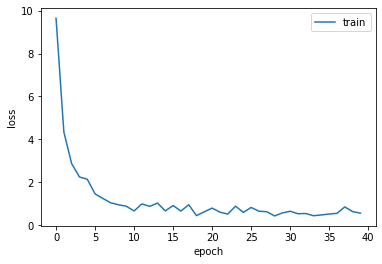

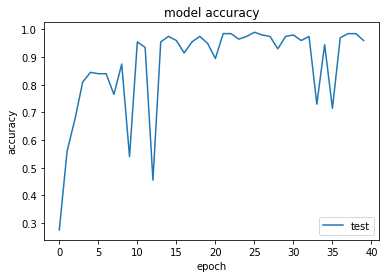

In [199]:
import matplotlib.pyplot as plt
# "Loss"
plt.plot(history_ssae.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#  "Accuracy"
plt.plot(history_ssae.history['val_accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower right')
plt.show()

### Proposed CSSAE 

In [200]:
import tensorflow as tf
# AutoEncoder Model Preparation
input_data_shape= tf.keras.layers.Input(shape=(28, 28, 1))
# define encoder
flutten_layer_1= tf.keras.layers.Flatten()(input_data_shape)

# define encoder

# SAE 1
encoder1= tf.keras.layers.Conv2D(128, (3,3), padding='same')(input_data_shape)
encoder1 = tf.keras.layers.BatchNormalization()(encoder1)
encoder1= tf.keras.layers.LeakyReLU()(encoder1)

bottleneck1 = tf.keras.layers.Conv2D(64, (3,3), padding='same')(encoder1)
bottleneck1 = tf.keras.layers.BatchNormalization()(bottleneck1)
bottleneck1= tf.keras.layers.ReLU()(bottleneck1)

decoder1 = tf.keras.layers.Conv2DTranspose(128, (3,3), padding='same')(bottleneck1)
decoder1 = tf.keras.layers.BatchNormalization()(decoder1)
decoder1 = tf.keras.layers.LeakyReLU()(decoder1)

# SAE 2
encoder2= tf.keras.layers.Conv2D(128, (3,3), padding='same')(decoder1)
encoder2 = tf.keras.layers.BatchNormalization()(encoder2)
encoder2= tf.keras.layers.LeakyReLU()(encoder2)

bottleneck2 = tf.keras.layers.Conv2D(64, (1,1), padding='same')(encoder2)
bottleneck2 = tf.keras.layers.BatchNormalization()(bottleneck2)
bottleneck2= tf.keras.layers.LeakyReLU()(bottleneck2)
bottleneck2= tf.keras.layers.MaxPooling2D()(bottleneck2)

decoder2 = tf.keras.layers.Conv2DTranspose(128, (3,3), padding='same')(bottleneck2)
decoder2 = tf.keras.layers.BatchNormalization()(decoder2)
decoder2 = tf.keras.layers.LeakyReLU()(decoder2)

# SAE 3
encoder3= tf.keras.layers.Conv2D(128, (3,3), padding='same')(bottleneck2)
encoder3 = tf.keras.layers.BatchNormalization()(encoder3)
encoder3= tf.keras.layers.LeakyReLU()(encoder3)

bottleneck3 = tf.keras.layers.Conv2D(32, (1,1), padding='same')(encoder3)
bottleneck3 = tf.keras.layers.BatchNormalization()(bottleneck3)
bottleneck3= tf.keras.layers.LeakyReLU()(bottleneck3)
bottleneck3= tf.keras.layers.MaxPooling2D()(bottleneck3)

decoder3 = tf.keras.layers.Conv2DTranspose(128, (3,3), padding='same')(bottleneck3)
decoder3 = tf.keras.layers.BatchNormalization()(decoder3)
decoder3 = tf.keras.layers.LeakyReLU()(decoder3)

# output layer
fin_layer = tf.keras.layers.Flatten()(bottleneck3)
output = tf.keras.layers.Dense(4, activation='softmax')(fin_layer)
# define autoencoder model
model_cssae = tf.keras.models.Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model_cssae.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cssae.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_34 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization_28 (Bat  (None, 28, 28, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_23 (LeakyReLU)  (None, 28, 28, 128)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 64)        73792     
                                                                 
 batch_normalization_29 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                         

In [201]:
history = model_cssae.fit(X_train, y_train, epochs=40, 
                    verbose=2, batch_size=8, 
                    validation_data = (X_test, y_test))

Epoch 1/40
50/50 - 1s - loss: 0.5842 - accuracy: 0.7950 - val_loss: 0.2870 - val_accuracy: 0.9200 - 979ms/epoch - 20ms/step
Epoch 2/40
50/50 - 0s - loss: 0.0357 - accuracy: 0.9925 - val_loss: 0.1032 - val_accuracy: 0.9900 - 397ms/epoch - 8ms/step
Epoch 3/40
50/50 - 0s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0504 - val_accuracy: 0.9950 - 393ms/epoch - 8ms/step
Epoch 4/40
50/50 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9950 - 395ms/epoch - 8ms/step
Epoch 5/40
50/50 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 0.9950 - 395ms/epoch - 8ms/step
Epoch 6/40
50/50 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9950 - 395ms/epoch - 8ms/step
Epoch 7/40
50/50 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 0.9950 - 396ms/epoch - 8ms/step
Epoch 8/40
50/50 - 0s - loss: 9.8350e-04 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 0.9950 - 405ms/epoch - 8ms/step
Epoch 9/40


In [202]:
test_loss, test_acc = model_cssae.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc*100, "%")

7/7 - 0s - loss: 0.0143 - accuracy: 0.9950 - 152ms/epoch - 22ms/step

Test accuracy: 99.50000047683716 %


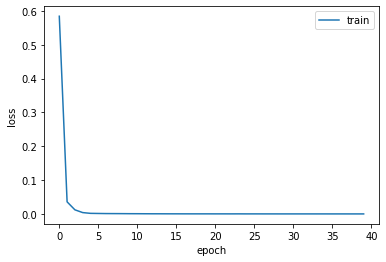

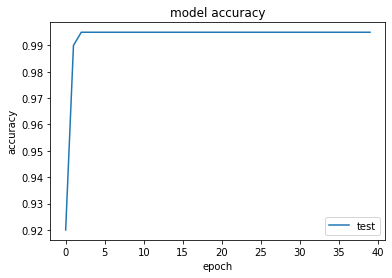

In [203]:
import matplotlib.pyplot as plt
# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

#  "Accuracy"
plt.plot(history.history['val_accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='lower right')
plt.show()

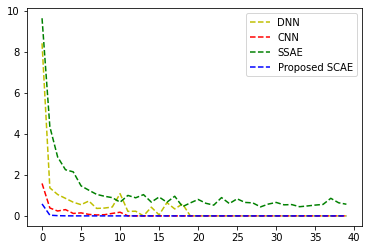

In [204]:
fig, ax = plt.subplots()
ax.plot(history_dnn.history['loss'], '--y', label='DNN')
ax.plot(history_cnn.history['loss'], '--r', label='CNN')
ax.plot(history_ssae.history['loss'], '--g', label='SSAE')
ax.plot(history.history['loss'], '--b', label='Proposed SCAE')
# ax.axis('equal')
leg = ax.legend();
# plt.savefig('Losses.png', dpi = 200)

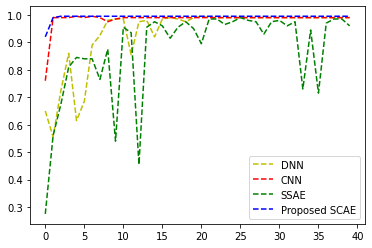

In [205]:
fig, ax = plt.subplots()
ax.plot(history_dnn.history['val_accuracy'], '--y', label='DNN')
ax.plot(history_cnn.history['val_accuracy'], '--r', label='CNN')
ax.plot(history_ssae.history['val_accuracy'], '--g', label='SSAE')
ax.plot(history.history['val_accuracy'], '--b', label='Proposed SCAE')
# ax.axis('equal')
leg = ax.legend();
# plt.savefig('Accuracy.png', dpi = 200)

7/7 [==============================] - 0s 4ms/step


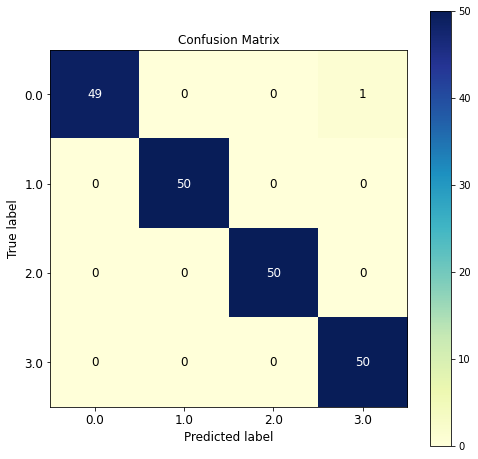

In [218]:
import scikitplot as skplt

predictions_CSAE = np.argmax(model_cssae.predict(X_test), axis=1)

skplt.metrics.plot_confusion_matrix(y_test,predictions_CSAE, figsize=(8,8), cmap= 'YlGnBu', text_fontsize='large')
plt.savefig('Proposed_SCAE_cm.png', dpi=200)

7/7 [==============================] - 0s 1ms/step


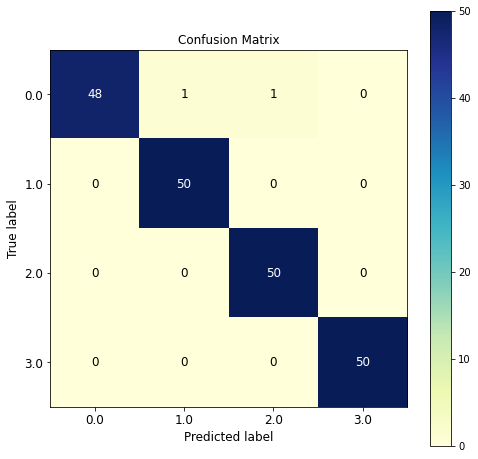

In [219]:
import scikitplot as skplt

predictions_dnn = np.argmax(model_dnn.predict(X_test), axis=1)

skplt.metrics.plot_confusion_matrix(y_test,predictions_dnn, figsize=(8,8), cmap= 'YlGnBu', text_fontsize='large')
plt.savefig('Dnn_cm.png', dpi=200)

7/7 [==============================] - 0s 1ms/step


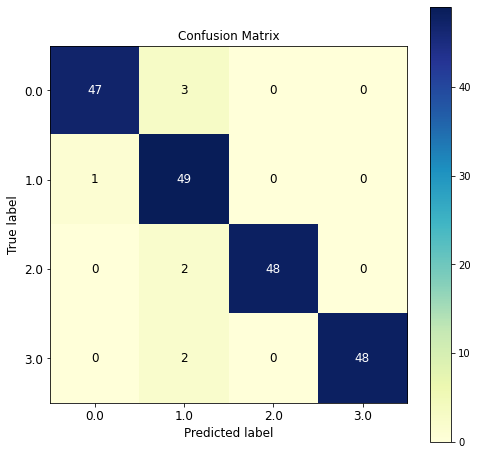

In [220]:
import scikitplot as skplt

predictions_ssae = np.argmax(model_ssae.predict(X_test), axis=1)

skplt.metrics.plot_confusion_matrix(y_test,predictions_ssae, figsize=(8,8), cmap= 'YlGnBu', text_fontsize='large')
plt.savefig('SSAE_cm.png', dpi=200)

7/7 [==============================] - 0s 2ms/step


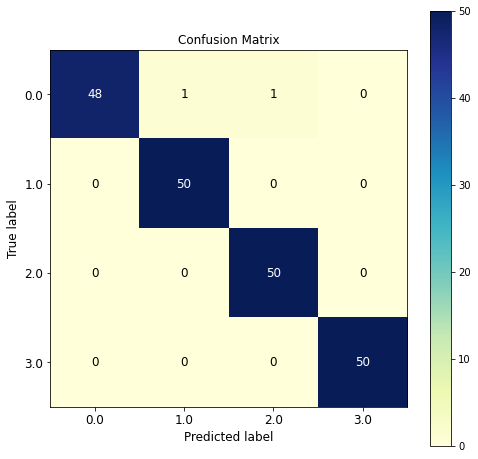

In [221]:
import scikitplot as skplt

predictions_cnn = np.argmax(model.predict(X_test), axis=1)

skplt.metrics.plot_confusion_matrix(y_test,predictions_cnn, figsize=(8,8), cmap= 'YlGnBu', text_fontsize='large')
plt.savefig('CNN_cm.png', dpi=200)